In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

In [3]:
X

array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

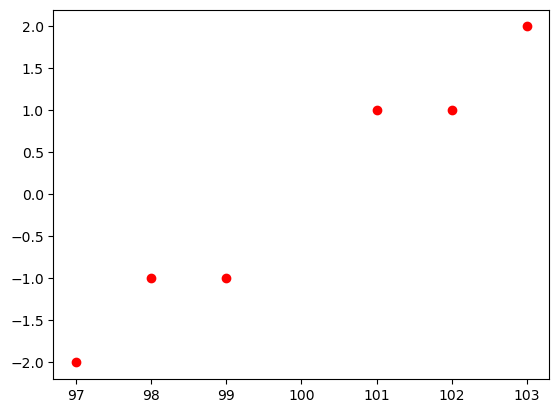

In [4]:
plt.plot(X[:,0], X[:,1], 'ro')

In [5]:
pca_1 = PCA(n_components = 1)
pca_1

PCA(n_components=1)

In [6]:
pca_1.fit(X)

PCA(n_components=1)

In [8]:
pd.DataFrame(pca_1.components_)

,0,1
0,-0.838492,-0.544914


In [12]:
scaler = StandardScaler().fit(X)
scaled_df = pd.DataFrame(scaler.fit_transform(X))
scaled_df

,0,1
0,-0.46291,-0.707107
1,-0.92582,-0.707107
2,-1.38873,-1.414214
3,0.46291,0.707107
4,0.92582,0.707107
5,1.38873,1.414214


In [11]:
pca_1.explained_variance_ratio_

array([0.99244289])

In [14]:
# 变成一个feature
X_trans_1 = pca_1.transform(X)
X_trans_1 

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

In [17]:
# 再从一个feature变回俩个feature的数据
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

In [19]:
X

array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

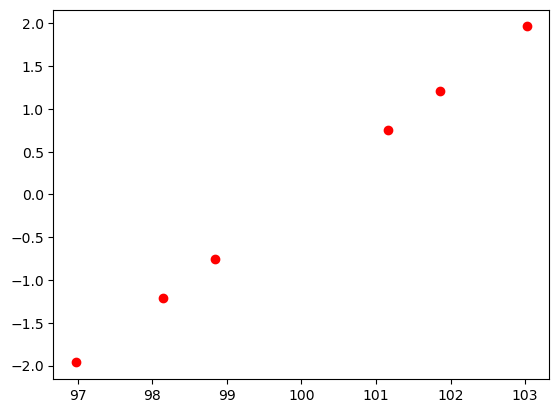

In [20]:
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

In [21]:
# 转换前和转换后的数据差不多，图也差不多

In [22]:
df = pd.read_csv("toy_dataset.csv")

In [23]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,27.422157,-29.662712,-23.297163,-15.161935,0.345581,3.706750,-5.507209,-46.992476,5.175469,-47.768145,...,7.815960,24.320965,-33.987522,22.306088,31.173511,31.264830,8.380699,-25.843189,36.706408,-43.480792
1,3.489482,-19.153551,-14.636424,14.688258,20.114204,13.532852,34.298084,22.982509,37.938670,-35.648144,...,11.145527,-38.886603,44.579337,37.308519,29.560535,-10.643331,-6.499263,19.921666,-3.528982,31.068739
2,4.293509,22.691579,-1.045155,-8.740350,12.401082,31.362987,-18.831206,-35.384557,8.161430,-16.421762,...,48.190331,-0.503157,-21.740678,15.972237,1.122335,-45.473538,10.518065,-5.818320,-29.466301,-13.676685
3,-2.139348,23.158754,-26.241206,19.426465,9.472049,8.453948,0.637211,-26.675984,-43.823329,11.840874,...,-51.613076,13.278858,-44.179281,32.912282,4.805774,3.960836,-15.888356,61.384773,33.112334,5.088320
4,-35.251034,27.281816,-29.470282,-21.786865,11.806822,58.655133,5.375230,59.740676,-49.007717,-21.801155,...,0.010857,20.975655,-21.358371,18.709369,22.362477,41.214565,-7.217724,31.173870,37.097532,-27.509420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-19.331647,-0.366931,-45.003810,23.471513,28.763623,5.200654,-9.390098,24.495059,18.614589,-12.676268,...,-0.530597,-25.886767,15.909870,-12.305992,11.665251,-40.847296,-32.090600,32.656975,-30.864307,33.994823
496,-22.401837,33.158476,-7.511213,-14.897442,32.850515,31.573870,39.305110,15.333884,-11.832214,11.403074,...,-6.084563,-4.721127,-48.339012,21.661988,-1.722079,19.024689,-20.936766,31.727079,12.405595,-10.071446
497,34.675516,-25.555242,-9.359657,-40.558102,7.370166,42.936061,20.610569,-8.113407,15.245024,-19.350496,...,18.593883,25.024820,-20.524914,21.288515,26.961624,8.657218,47.231649,-6.338811,13.502616,-25.652088
498,28.873332,49.657090,-40.581331,-36.620498,-44.246918,5.831656,24.495664,-52.132250,22.615132,-9.985665,...,-33.513126,-15.557405,-9.446663,-1.540528,20.153705,-54.249946,-35.893373,55.850888,-19.910680,45.281842
